In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [0]:
# para gerar o grafico no browser
%matplotlib inline

In [29]:
# local dos dados e modifica o diretorio
#path='/home/ucfilho/Documents/Aulas/Ago_29_2018'
#os.chdir(path)
!git clone http://github.com/ucfilho/ANN
%cd ANN
!ls  

Cloning into 'ANN'...
remote: Counting objects: 51, done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 51 (delta 14), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.
/content/ANN/ANN
ann_aula_ago_14_2018_leitura_git.ipynb
ANN_aula_Scikit_learn _ago_29_2018.ipynb
ANN_Hydrofoil_ago_29_2018.txt.ipynb
ANN_Hydrofoil_Clean_02_set_12_2018.ipynb
ANN_Hydrofoil_Neuronicos_02__set_12_2018.ipynb
ANN_Hydrofoil_set_05_2018.ipynb
ANN_Hydrofoil_set_12_2018.ipynb
Aprendendo_Um_Pouco_mais_sobre_Python_set_05_2018.ipynb
arvore.jpg
Aula_003_Python_audio_e_imagem_ago_29_2018.ipynb
aula_04_rede_neural_set_05_2018.pdf
BBC_007041008.wav
Criando_Gethub_Ver_Youtube.txt
FAULT_DIAGNOSIS_maio_25_2017.txt
Hydrofoil_ago_29_2018.csv
john_mccarthy.png
Paper_Carvao_China_abril_12_2016.csv
Paper_Carvao_China_mar_31_2016.txt
README.md
simbolos.pdf
Video_mp4_Python_Notebook.ipynb


In [0]:
# leitura dos dados
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [31]:
# separa as colunas de interesse
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [0]:
# funcao normatiza dados, intervalo de -1 a 1)
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [34]:
# separa os dados em normatizados e originais
DAT_OLD=[]
# Guarda os dados antes de serem normatizados, para que não sejam perdidos
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
print(DAT.head())
print('================================================================')
print(DAT_OLD.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0       -1.0 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
1       -1.0 -0.913570   -0.986458 -0.895478 -0.459481 -0.999415
2       -1.0 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
3       -1.0 -0.861711   -0.966146 -0.916618 -0.456079 -0.997659
4       -1.0 -0.844425   -0.956354 -0.924482 -0.449160 -0.996605
   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [35]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
#train e test possui tanto x (entrada/independente) quanto y (saida/dependente)
print(train.head())
print("===================================================================")
print(train.shape[0]) #mostrar o numero de linhas
print("===================================================================")
print(test.head())
print("===================================================================")
print(test.shape[0])

    Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
15  -1.000000  0.728608    0.626042  0.702954  0.911268  0.405395
33   0.333333 -0.654278   -0.625000 -0.972975 -0.175747 -0.935177
45   1.000000 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
30  -0.333333  1.000000    1.000000  0.821280  0.354626  1.000000
31   0.333333 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
47
    Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
7   -1.000000 -0.481417   -0.311979 -0.711975  0.761513 -0.821602
12  -1.000000  0.382887    0.395833  0.444609  1.000000 -0.034860
17  -0.333333 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
19  -0.333333 -0.654278   -0.630208 -0.968684 -0.157783 -0.936077
20  -0.333333 -0.481417   -0.273437 -0.673691  0.730444 -0.811609
12


In [36]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]
print(x_test.head())
print('================================================================')
print(x_train.head())
print('================================================================')
print(X_OLD.head())

    Hydrofoil    Froude
7   -1.000000 -0.481417
12  -1.000000  0.382887
17  -0.333333 -1.000000
19  -0.333333 -0.654278
20  -0.333333 -0.481417
    Hydrofoil    Froude
15  -1.000000  0.728608
33   0.333333 -0.654278
45   1.000000 -1.000000
30  -0.333333  1.000000
31   0.333333 -1.000000
   Hydrofoil    Froude
0          1  0.000000
1          1  0.103733
2          1  0.124480
3          1  0.165973
4          1  0.186719


In [37]:
# obtem as variaveis dependentes (treino e teste)
Index=[2,3,4,5]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_test.head())
print('================================================================')
print(y_train.head())
print('================================================================')
print(Y_OLD.head())

    Resistence   Sinkage      Trim     Power
7    -0.311979 -0.711975  0.761513 -0.821602
12    0.395833  0.444609  1.000000 -0.034860
17   -1.000000 -0.883085 -1.000000 -1.000000
19   -0.630208 -0.968684 -0.157783 -0.936077
20   -0.273437 -0.673691  0.730444 -0.811609
    Resistence   Sinkage      Trim     Power
15    0.626042  0.702954  0.911268  0.405395
33   -0.625000 -0.972975 -0.175747 -0.935177
45   -1.000000 -0.883085 -1.000000 -1.000000
30    1.000000  0.821280  0.354626  1.000000
31   -1.000000 -0.883085 -1.000000 -1.000000
   Resistence   Sinkage      Trim     Power
0    0.000000  0.000000  0.000000  0.000000
1    2.549729 -0.689028  1.353022  0.950991
2    3.628461 -0.835413  1.346323  1.624000
3    6.374322 -1.864337  1.361538  3.803965
4    8.217973 -2.301539  1.378858  5.517212


In [0]:
# define a rede neural 
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8), 
                    random_state=1)

In [39]:
# treina a rede neural
clf.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [40]:
# usa a rede neural treina em calculos para treino e teste
# predizer os dados de saida (y) tanto para traino quanto para teste
# pois quero no gráfico essas duas informações
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)
print(y_calc_train[0:5,:])

[[ 0.66292873  0.65783967  0.83089047  0.43994463]
 [-0.63265415 -0.92833761 -0.07377747 -0.92640635]
 [-1.04743152 -0.88944516 -1.03201031 -1.00073009]
 [ 1.02832065  0.83229039  0.29730417  1.03218267]
 [-1.08203372 -0.86203714 -0.90760323 -1.01381939]]


In [41]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names
print(y_calc_train.head())

   Resistence   Sinkage      Trim     Power
0    0.662929  0.657840  0.830890  0.439945
1   -0.632654 -0.928338 -0.073777 -0.926406
2   -1.047432 -0.889445 -1.032010 -1.000730
3    1.028321  0.832290  0.297304  1.032183
4   -1.082034 -0.862037 -0.907603 -1.013819


In [42]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
print(y_calc_test.head())
print('================================================================')
print(y_calc_train.head())

   Resistence    Sinkage      Trim        Power
0  115.816789   5.949134  3.488917   304.941322
1  254.055487  71.814459  4.587555  1519.815007
2  -19.282288   1.961366  0.367275   -29.267203
3   62.301738   0.099972  2.130392   128.586577
4  112.792622   9.282469  3.225806   279.926521
   Resistence    Sinkage      Trim        Power
0  313.108992  85.670640  4.583068  2339.987470
1   69.166697  -2.515907  2.318512   119.593636
2   -8.930771  -0.353607 -0.080128    -1.186439
3  381.907790  95.369560  3.247400  3302.406124
4  -15.445939   1.170194  0.231287   -22.457250


In [0]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [0]:
# escolhe uma das resposta para fazer o grafico (resistencia-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Resistence'].copy()
resist_obs_train=train['Resistence'].copy()

In [45]:
# escolhe uma das resposta para fazer o grafico (resistencia-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Resistence'].copy()
resist_obs_test=test['Resistence'].copy()
print(resist_calc_test.head())

0    115.816789
1    254.055487
2    -19.282288
3     62.301738
4    112.792622
Name: Resistence, dtype: float64


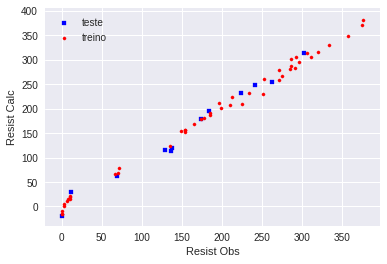

In [46]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)#mostra dois graficos sob o mesmo eixo 

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')
plt.show()

In [0]:
#from é usado para carregar apenas uma função de uma biblioteca
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [48]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 191.3928536554546
R^2 teste= 0.9770579496699476


In [49]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 66.66909108999852
R^2 treino= 0.9951538838911386


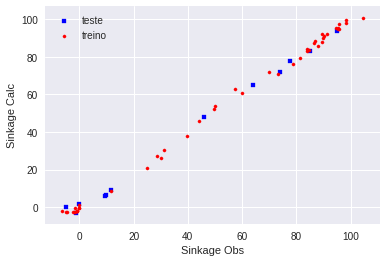

MSE teste= 6.395748314505762
R^2 teste= 0.9952504635892528
MSE treino= 4.454196907381907
R^2 treino= 0.9972079814049954


In [50]:
#variavel Sinkage
resist_calc_train=y_calc_train['Sinkage'].copy()
resist_obs_train=train['Sinkage'].copy()
resist_calc_test=y_calc_test['Sinkage'].copy()
resist_obs_test=test['Sinkage'].copy()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Sinkage Calc')
plt.xlabel('Sinkage Obs')
plt.show()
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)
print('================================================================')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

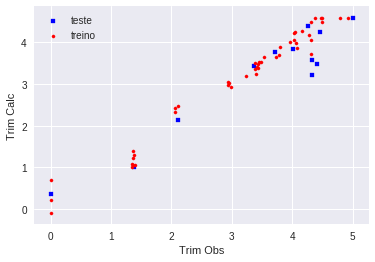

MSE teste= 0.26530942994958345
R^2 teste= 0.872348515483574
MSE treino= 0.047577174757135125
R^2 treino= 0.9724517293074866


In [51]:
#variavel Trim
resist_calc_train=y_calc_train['Trim'].copy()
resist_obs_train=train['Trim'].copy()
resist_calc_test=y_calc_test['Trim'].copy()
resist_obs_test=test['Trim'].copy()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Trim Calc')
plt.xlabel('Trim Obs')
plt.show()
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)
print('================================================================')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

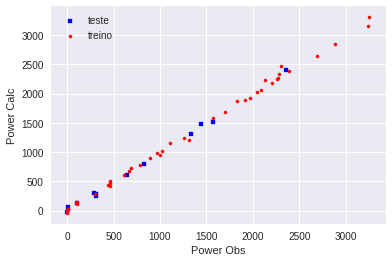

MSE teste= 1485.4740774222337
R^2 teste= 0.9971229118910193
MSE treino= 1988.7203079318397
R^2 treino= 0.9980042190167484


In [52]:
#variavel Power
resist_calc_train=y_calc_train['Power'].copy()
resist_obs_train=train['Power'].copy()
resist_calc_test=y_calc_test['Power'].copy()
resist_obs_test=test['Power'].copy()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)
print('================================================================')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)